#Preprocessing

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


1 Pregnancies: Number of times pregnant.
2 Glucose: Plasma glucose concentration over 2 hours in an oral
  glucose tolerance test.
3 BloodPressure: Diastolic blood pressure (mm Hg).
4 SkinThickness: Triceps skinfold thickness (mm).
5 Insulin: 2-Hour serum insulin (mu U/ml).
6 BMI: Body mass index (weight in kg / height in m^2).
7 DiabetesPedigreeFunction: Diabetes pedigree function, a  
  genetic  score of diabetes.
8 Age: Age in years.
9 Outcome: Binary classification indicating the presence (1) or
   absence (0) of diabetes.

In [2]:
# Read the CSV file
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#get column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

#Data Cleaning

In [5]:
#check unique values

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print ("Number of duplicated rows :", df.duplicated().sum())

Number of duplicated rows : 0


#Visualization

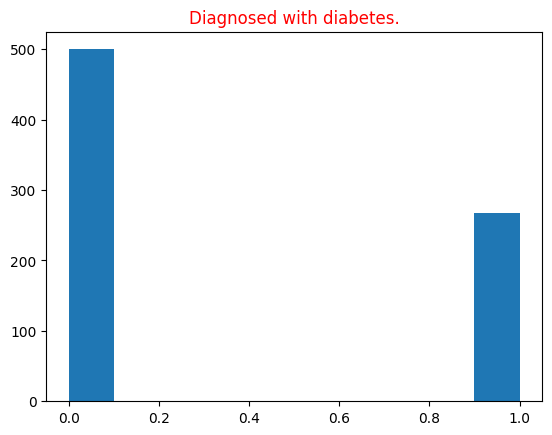

In [8]:
plt.hist(df['Outcome'], bins=10)
plt.title("Diagnosed with diabetes.", color='r')
plt.show()

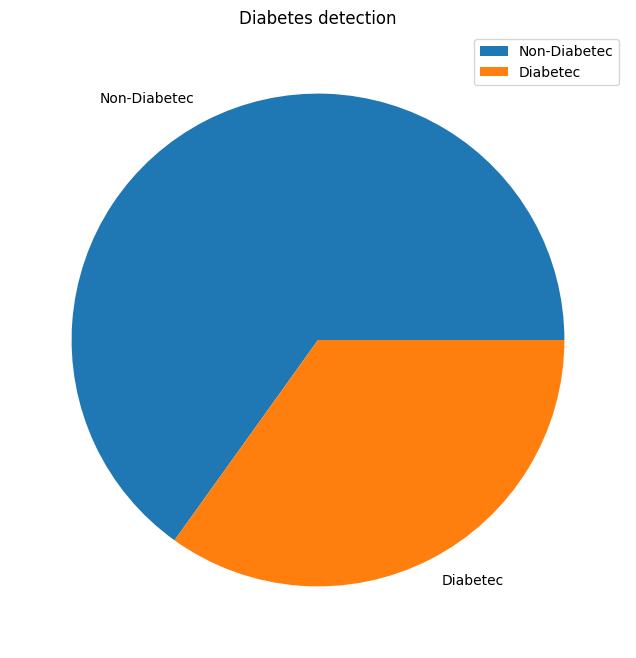

In [9]:
plt.figure(figsize=(8,8))
diabetes_counts=df['Outcome'].value_counts()
Name=['Non-Diabetec','Diabetec']
plt.pie(diabetes_counts, labels=Name)
plt.title('Diabetes detection')
plt.legend()
plt.show()

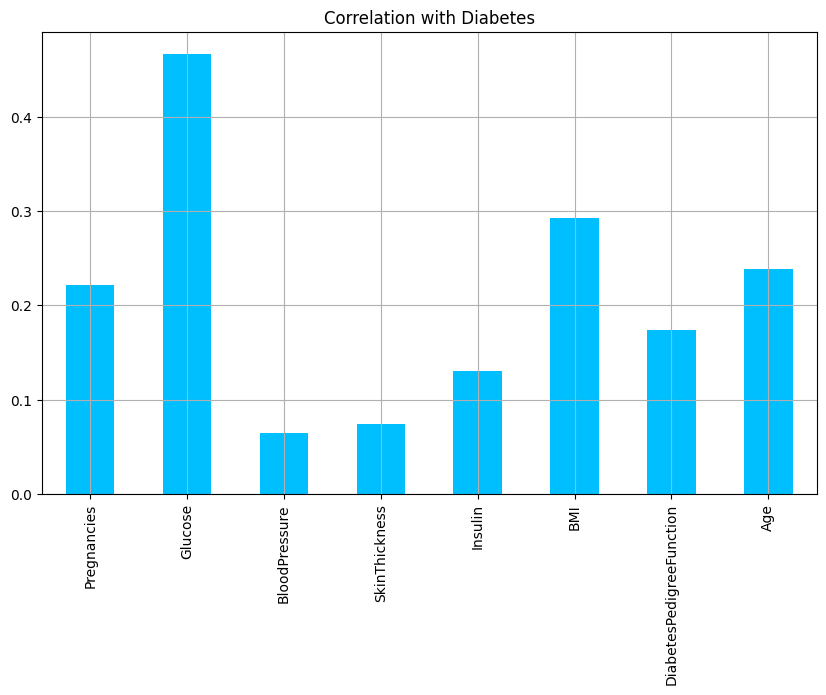

In [10]:
#check correlation of other columns with diabetes column
df.drop('Outcome', axis=1).corrwith(df.Outcome).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue");

<Axes: >

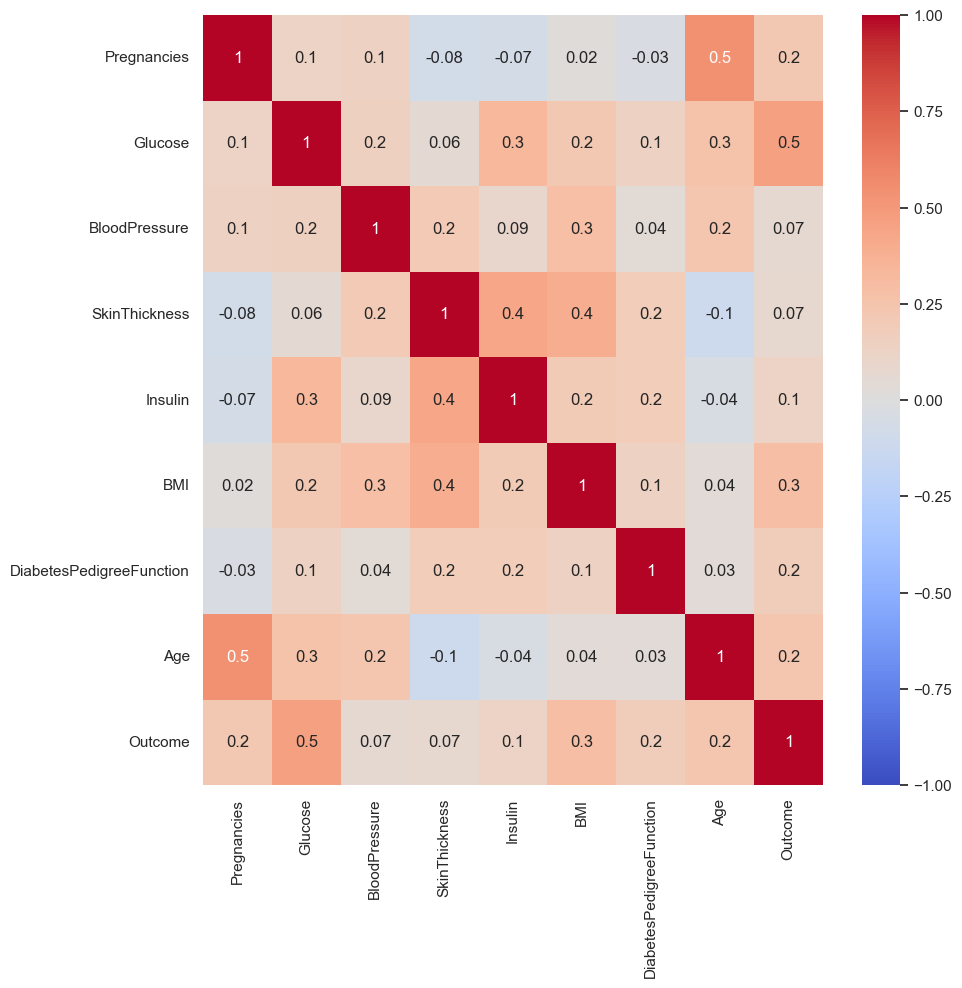

In [11]:
#variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#Splitting Data

In [15]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


#Model Building & Selection

1. KNN


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train,Y_train)
print ( 'KNNModel Train Score is :', knnmodel.score(X_train , Y_train) )
print ( 'KNNModel Test Score is :', knnmodel.score(X_test , Y_test) )

KNNModel Train Score is : 0.7932960893854749
KNNModel Test Score is : 0.7532467532467533


In [26]:
Y_pred1 = knnmodel.predict (X_test)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred1)
cm

array([[131,  19],
       [ 38,  43]], dtype=int64)

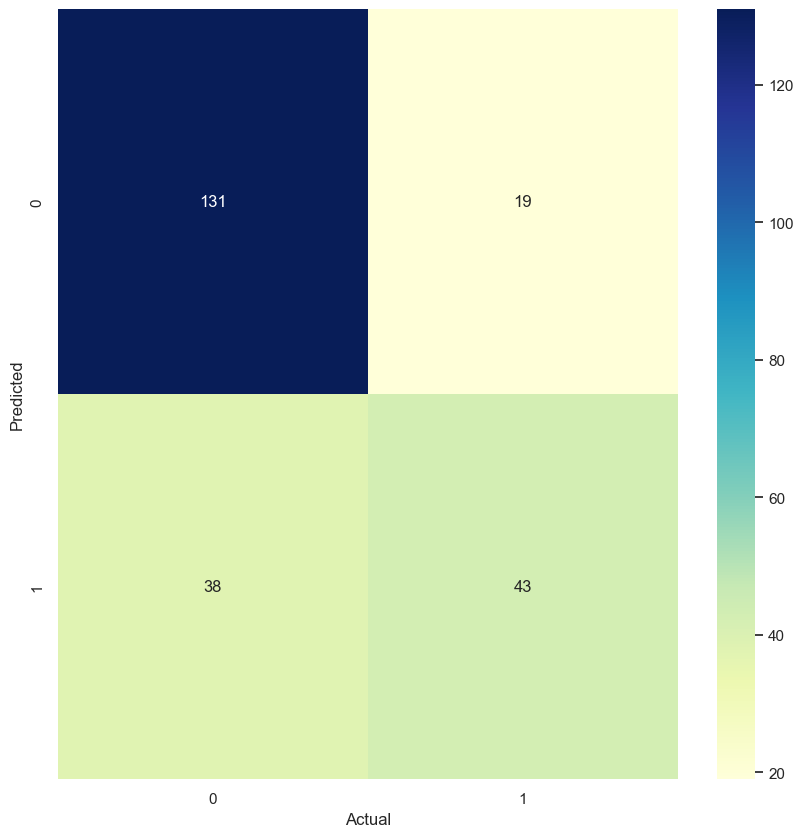

In [28]:
sns.heatmap (cm, annot_kws= {"size" :12 }, annot= True, fmt="g", cmap= "YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [29]:
print ( classification_report (Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



2. Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
NBModel = GaussianNB()
NBModel.fit(X_train , Y_train)
print ('NBModel Train Score is : ', NBModel.score(X_train,Y_train))
print ('NBModel Test Score is : ', NBModel.score(X_test,Y_test))

NBModel Train Score is :  0.7616387337057728
NBModel Test Score is :  0.7748917748917749


In [31]:
Y_pred2 = NBModel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test, Y_pred2)
cm

array([[133,  17],
       [ 35,  46]], dtype=int64)

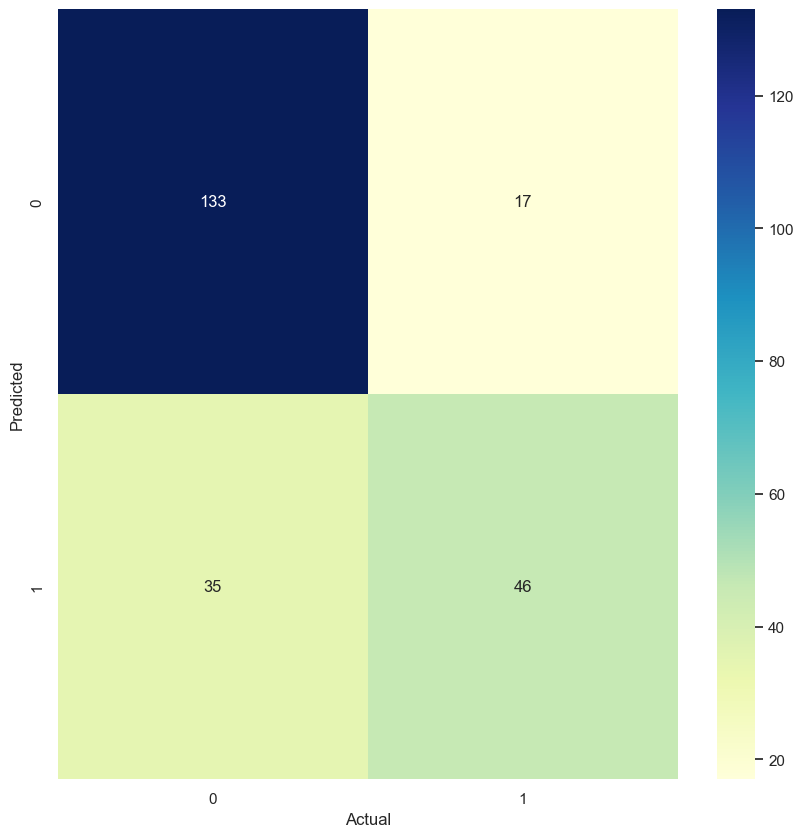

In [33]:
sns.heatmap (cm, annot_kws= {"size" :12 }, annot= True, fmt="g", cmap= "YlGnBu")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [34]:
print (classification_report (Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.73      0.57      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



3. Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=50)
RFModel.fit(X_train, Y_train)
print('DTModel Train Score is : ', RFModel.score(X_train, Y_train))
print('DTModel Test Score is : ', RFModel.score(X_test, Y_test))

DTModel Train Score is :  0.994413407821229
DTModel Test Score is :  0.7359307359307359


In [36]:
Y_pred = RFModel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[129,  21],
       [ 40,  41]], dtype=int64)

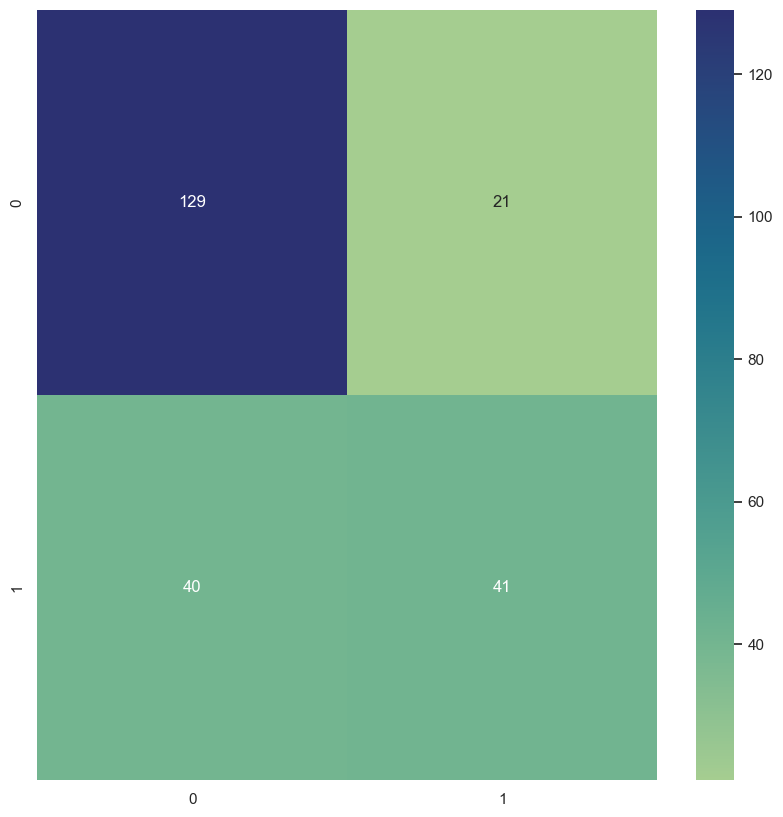

In [38]:
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="g", cmap="crest")
plt.show()

In [39]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.51      0.57        81

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



4. Logistic Regression

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

print('Accuracy of Train : ', classifier.score(X_train, Y_train))
print('Accuracy of Test : ', classifier.score(X_test, Y_test))

Accuracy of Train :  0.7802607076350093
Accuracy of Test :  0.7792207792207793


In [41]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(X, test_size = 0.25, random_state = 0)

[[139  11]
 [ 40  41]]


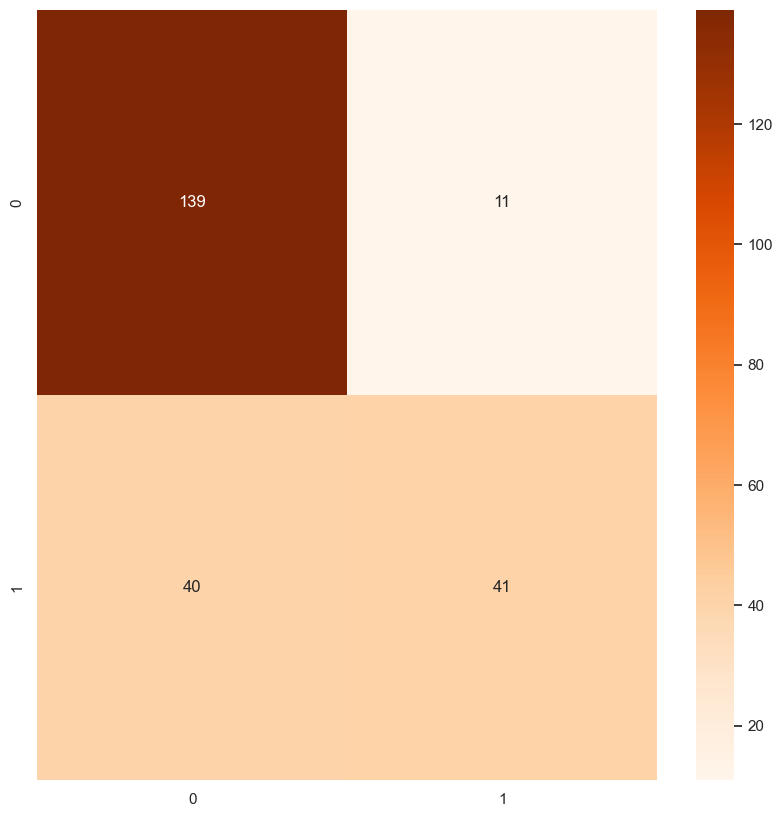

In [42]:
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="g", cmap="Oranges")
plt.show()

In [43]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.84       150
           1       0.79      0.51      0.62        81

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.78      0.76       231



In [44]:
input_data = (0,180,66,39,0,42,1.893,25)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = NBModel.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-1.14185152  1.84983245 -0.16054575  1.15818217 -0.69289057  1.27013443
   4.29196222 -0.70119842]]
[1]
The person is diabetic


c:\Users\Forensic Lab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Forensic Lab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [45]:
import pickle
with open('NBModel.pkl', 'wb') as file:
    pickle.dump(NBModel, file)